# Rugby Data Experiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
rugby = pd.read_csv("RugbyData.csv")

In [3]:
#rugby.head(5)

## All_Scores is a series made from the Score1 and Score2 columns

In [4]:
All_Scores = rugby['Score1'].append(rugby['Score2'])
#All_Scores.head(5)

## Countplot for scores

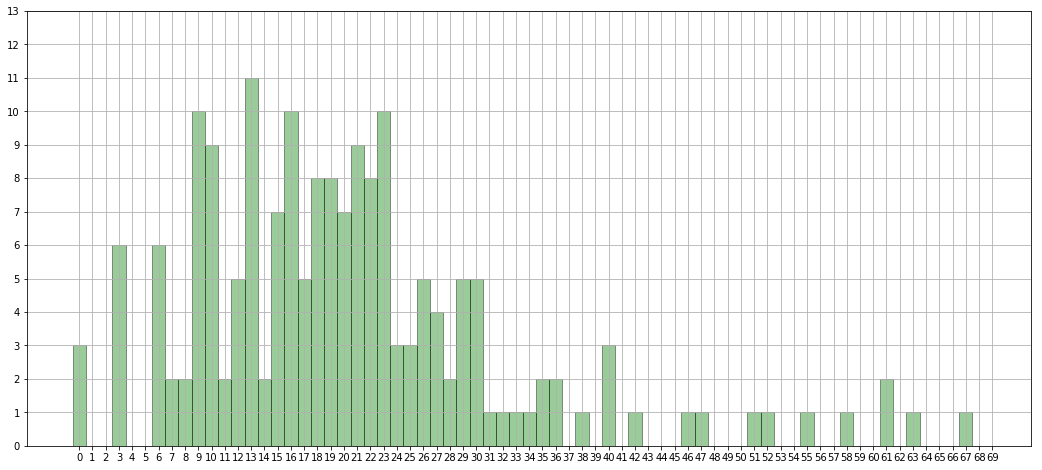

In [17]:
fig1 = plt.figure(figsize=(18,8))
ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')
ax.set(xticks=range(0,70))
ax.set(yticks=range(0,14))
ax.grid()

#### Common scores seen in the ranges 9-10, 12-13, 15-23, 26-30

## Team Specifics

## Function to return match history of 2 teams

In [6]:
def match_history(country1, country2):
    games1 = rugby[(rugby['Team1']==country1) & (rugby['Team2']==country2)]
    games2 = rugby[(rugby['Team2']==country1) & (rugby['Team1']==country2)]
    c = games2.columns
    games2[[c[0], c[3]]] = games2[[c[3], c[0]]]
    games2[[c[1], c[2]]] = games2[[c[2], c[1]]]
    games = games1.append(games2)
    games.sort_index(inplace=True)
    games.loc['Mean Score'] = games.mean()
    games = games.round(1)
    return games

In [7]:
mh = match_history("Wales", "England")
mh

,Team1,Score1,Score2,Team2,Time,Year
4,Wales,16.0,21.0,England,16:50,2017.0
25,Wales,21.0,25.0,England,16:00,2016.0
30,Wales,16.0,21.0,England,20:05,2015.0
56,Wales,18.0,29.0,England,15:00,2014.0
73,Wales,30.0,3.0,England,17:00,2013.0
82,Wales,19.0,12.0,England,16:00,2012.0
Mean Score,NaN,20.0,18.5,NaN,NaN,2014.5


#### Here we will create a regression plot of the scores from a pair of teams' match history

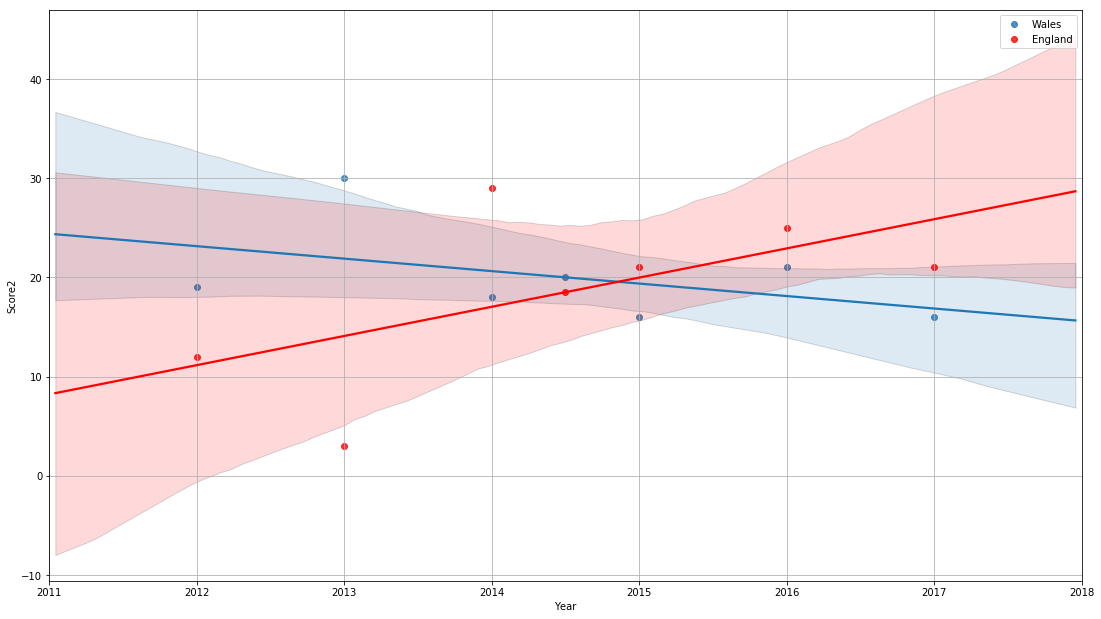

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
p = sns.regplot(x='Year', y='Score1', data=mh, ax=ax, label=mh['Team1'][0])
p2 = sns.regplot(x='Year', y='Score2', data=mh, ax=ax, label=mh['Team2'][0], color='r')
plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")

In [9]:
p.get_lines()[0].get_ydata()

array([ 24.34768116,  24.25984921,  24.17201727,  24.08418533,
        23.99635339,  23.90852144,  23.8206895 ,  23.73285756,
        23.64502562,  23.55719367,  23.46936173,  23.38152979,
        23.29369785,  23.2058659 ,  23.11803396,  23.03020202,
        22.94237008,  22.85453813,  22.76670619,  22.67887425,
        22.5910423 ,  22.50321036,  22.41537842,  22.32754648,
        22.23971453,  22.15188259,  22.06405065,  21.97621871,
        21.88838676,  21.80055482,  21.71272288,  21.62489094,
        21.53705899,  21.44922705,  21.36139511,  21.27356317,
        21.18573122,  21.09789928,  21.01006734,  20.9222354 ,
        20.83440345,  20.74657151,  20.65873957,  20.57090763,
        20.48307568,  20.39524374,  20.3074118 ,  20.21957986,
        20.13174791,  20.04391597,  19.95608403,  19.86825209,
        19.78042014,  19.6925882 ,  19.60475626,  19.51692432,
        19.42909237,  19.34126043,  19.25342849,  19.16559655,
        19.0777646 ,  18.98993266,  18.90210072,  18.81

In [10]:
p2.get_lines()[0].get_ydata()

array([ 24.34768116,  24.25984921,  24.17201727,  24.08418533,
        23.99635339,  23.90852144,  23.8206895 ,  23.73285756,
        23.64502562,  23.55719367,  23.46936173,  23.38152979,
        23.29369785,  23.2058659 ,  23.11803396,  23.03020202,
        22.94237008,  22.85453813,  22.76670619,  22.67887425,
        22.5910423 ,  22.50321036,  22.41537842,  22.32754648,
        22.23971453,  22.15188259,  22.06405065,  21.97621871,
        21.88838676,  21.80055482,  21.71272288,  21.62489094,
        21.53705899,  21.44922705,  21.36139511,  21.27356317,
        21.18573122,  21.09789928,  21.01006734,  20.9222354 ,
        20.83440345,  20.74657151,  20.65873957,  20.57090763,
        20.48307568,  20.39524374,  20.3074118 ,  20.21957986,
        20.13174791,  20.04391597,  19.95608403,  19.86825209,
        19.78042014,  19.6925882 ,  19.60475626,  19.51692432,
        19.42909237,  19.34126043,  19.25342849,  19.16559655,
        19.0777646 ,  18.98993266,  18.90210072,  18.81

In [11]:
print("hello test")

hello test
